#  <i><center><span style="color:red">MÔ HÌNH DỰ ĐOÁN GIÁ XE VỚI MULTIPLE LINEAR REGRESSION (CƠ BẢN)</span></center></i>
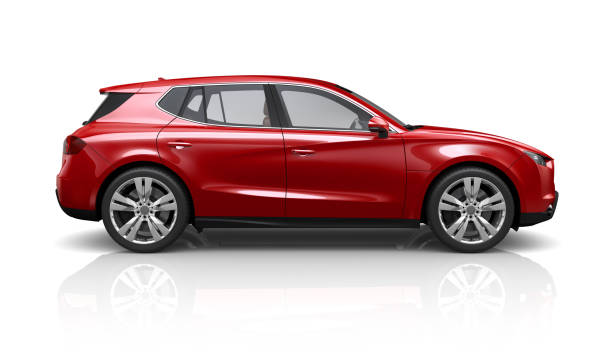
### <center>Email: tranhakhanhduy2001@gmail.com</center>

## Nội dung
<div style="margin-top: 20px">
    
[Mục tiêu](#000)<br>    
1.  [Thu thập dữ liệu](#00)<br>
2.  [Làm sạch dữ liệu](#0)<br>
    2.1  [Xử lí dữ liệu bị thiếu](#01)<br>
    2.2  [Xử lí kiểu dữ liệu](#02)<br>
    2.3  [Chuẩn hóa dữ liệu](#03)<br>
    2.4  [Rời rạc hóa dữ liệu](#04)<br>
    2.4  [Biến giả](#05)<br>
3.  [Tương quan dữ liệu](#1) <br>
4.  [Phát triển và đánh giá mô hình](#2) <br>
    4.1  [Mô hình MLR](#21)<br>
    4.2  [Đánh giá mô hình bằng trực quan hóa dữ liệu](#22)<br>
    4.3  [Đánh giá mô hình bằng MSR và R2](#23)<br>
</div>

# <span style="color:blue">Mục tiêu
</span><a id="000"></a>

Mục tiêu của bài phân tích như sau:
- Vận dụng kiến thức để thu thập dữ liệu
- Thực hành xử lí dữ liệu
- Khám phá tương quan dữ liệu cơ bản
- Huấn luyện mô hình dự đoán giá xe

##### Vì bài phân tích chỉ tập trung vào Multiple linear regression nên sẽ không đề cập đến các mô hình như: Simple Linear Regression, polynomial regression, ridge regresionn,... cũng như không chi tiết về phần đánh giá và sàng lọc, kiểm tra mô hình (Overfitting, Underfitting). Các phần này sẽ được thực hiện trong một bài phân tích chi tiết hơn.

Thêm các thư viện cần thiết

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
%matplotlib inline 

# <span style="color:blue">Thu thập dữ liệu
</span><a id="00"></a>

In [2]:
file_path="./auto.csv"

Sử dụng List Header trong Python để tạo danh sách chứa tên các cột

In [3]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [4]:
data_cars=pd.read_csv(file_path,names=headers)

In [5]:
data_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [6]:
data_cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Như chúng ta có thể thấy, một số dấu hỏi đã xuất hiện trong khung dữ liệu. Những việc sai sót trong dữ liệu này sẽ làm cản trở quá trình phân tích dữ liệu vì thế ta phải loại bỏ chúng.

# <span style="color:blue">Làm sạch dữ liệu </span><a id="0"></a>

### <span style="color:blue">Xử lý dữ liệu bị thiếu</span><a id="01"></a>

Xác định dữ liệu mang giá trị '?' trong bộ dữ liệu chuyển thành NaN (not a number)

In [7]:
data_cars.replace("?", np.nan, inplace = True)
data_cars.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [8]:
missing_data = data_cars.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Đếm dữ liệu bị thiếu tại mỗi cột

In [9]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

Theo như báo cáo ở trên có tổng cộng 7 cột bị thiếu dữ liệu:

<ol>
    <li>"normalized-losses": 41 dữ liệu bị thiếu</li>
    <li>"num-of-doors": 2 dữ liệu bị thiếu</li>
    <li>"bore": 4 dữ liệu bị thiếu</li>
    <li>"stroke" : 4 dữ liệu bị thiếu</li>
    <li>"horsepower": 2 dữ liệu bị thiếu</li>
    <li>"peak-rpm": 2 dữ liệu bị thiếu</li>
    <li>"price": 4 dữ liệu bị thiếu</li>
</ol>


Chung ta có thể xử lý dữ liệu bị thiếu theo các cách sau:

Thay thế bằng giá trị trung bình đối với các cột sau:
- "normalized-losses"
- "stroke"
- "bore"
- "horsepower"
- "peak-rpm"

Thay thế bằng giá trị thường xuyên xuất hiện nhất:
"num-of-doors": thay thế các giá trị NaN thành thành giá trị có tấn suất xuất hiện nhiều nhất.

Riêng đối với "price" ta sẽ xóa cả hàng. Vì Price là dữ liệu chúng ta cần để dự đoán nên việc thay thế dữ liệu này sẽ gây ra sự không chính xác cho kết quả dự đoán.

In [10]:
avg_norm_loss = data_cars["normalized-losses"].astype("float").mean(axis=0)
print("Giá trị trung bình của normalized-losses là:", avg_norm_loss)
data_cars["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

Giá trị trung bình của normalized-losses là: 122.0


In [11]:
avg_bore=data_cars['bore'].astype('float').mean(axis=0)
print("Giá trị trung bình của 'bore' là:", avg_bore)
data_cars["bore"].replace(np.nan, avg_bore, inplace=True)

Giá trị trung bình của 'bore' là: 3.3297512437810957


In [12]:
avg_stroke=data_cars['stroke'].astype('float').mean(axis=0)
print("Giá trị trung bình của 'stroke' là:", avg_stroke)
data_cars["stroke"].replace(np.nan, avg_stroke, inplace=True)

Giá trị trung bình của 'stroke' là: 3.2554228855721337


In [13]:
avg_horsepower=data_cars['horsepower'].astype('float').mean(axis=0)
print("Giá trị trung bình của 'horsepower' là:", avg_horsepower)
data_cars["horsepower"].replace(np.nan, avg_horsepower, inplace=True)

Giá trị trung bình của 'horsepower' là: 104.25615763546799


In [14]:
avg_peakrpm=data_cars['peak-rpm'].astype('float').mean(axis=0)
print("Giá trị trung bình của 'peak-rpm' là:", avg_peakrpm)
data_cars["peak-rpm"].replace(np.nan, avg_peakrpm, inplace=True)

Giá trị trung bình của 'peak-rpm' là: 5125.369458128079


In [15]:
data_cars['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [16]:
data_cars["num-of-doors"].replace(np.nan, "four", inplace=True)

In [17]:
# xóa các dòng với price có giá trị NaN
data_cars.dropna(subset=["price"], axis=0, inplace=True)

# reset lại chỉ mục vì vừa xóa các dòng
data_cars.reset_index(drop=True, inplace=True)

In [18]:
data_cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### <span style="color:blue">Xử lí kiểu dữ liệu</span><a id="02"></a>

In [19]:
data_cars.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [20]:
data_cars[["bore", "stroke"]] = data_cars[["bore", "stroke"]].astype("float")
data_cars[["normalized-losses"]] = data_cars[["normalized-losses"]].astype("int")
data_cars[["price"]] = data_cars[["price"]].astype("float")
data_cars[["peak-rpm"]] = data_cars[["peak-rpm"]].astype("float")

### <span style="color:blue">Chuẩn hóa dữ liệu</span><a id="03"></a>

Ta sẽ thực hiện chuẩn hóa dữ liệu cho 3 cột chiều dài, chiều rộng và cao

In [21]:
data_cars['length'] = data_cars['length']/data_cars['length'].max()
data_cars['width'] = data_cars['width']/data_cars['width'].max()
data_cars['height'] = data_cars['height']/data_cars['height'].max()

### <span style="color:blue">Rời rạc hóa dữ liệu</span><a id="04"></a>

Ta sẽ chia cột horsepower(Mã lực) thành các mức  high horsepower, medium horsepower, và little horsepower.

In [22]:
data_cars["horsepower"]=data_cars["horsepower"].astype(int, copy=True)
bins = np.linspace(min(data_cars["horsepower"]), max(data_cars["horsepower"]), 4)
group_names = ['Low', 'Medium', 'High']
data_cars['horsepower-binned'] = pd.cut(data_cars['horsepower'], bins, labels=group_names, include_lowest=True )
data_cars[['horsepower','horsepower-binned']].head(20)
data_cars["horsepower-binned"].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

### <span style="color:blue">Biến giả</span><a id="05"></a>

Mô hình hồi quy tuyến tính sẽ không hiểu chữ mà chỉ nhận giá trị số. Vì vậy ta cần chuyển cột fuel-type với 2 giá trị gas và diesel thành 2 cột chứa các giá trị 0 và 1

In [23]:
dummy_variable_1 = pd.get_dummies(data_cars["fuel-type"])
dummy_variable_1.head()
dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable_1.head()
data_cars = pd.concat([data_cars, dummy_variable_1], axis=1)
#Xóa cột fuel-tyoe cũ
data_cars.drop("fuel-type", axis = 1, inplace=True)
data_cars.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111,5000.0,21,27,13495.0,Low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111,5000.0,21,27,16500.0,Low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,3.47,9.0,154,5000.0,19,26,16500.0,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,3.40,10.0,102,5500.0,24,30,13950.0,Low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,3.40,8.0,115,5500.0,18,22,17450.0,Low,0,1


In [24]:
data_cars.aspiration.value_counts()

std      165
turbo     36
Name: aspiration, dtype: int64

Tương tự với cột aspiration

In [25]:
dummy_variable_2 = pd.get_dummies(data_cars["aspiration"])
dummy_variable_2.head()
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo':'aspiration-turbo'}, inplace=True)
dummy_variable_2.head()
data_cars = pd.concat([data_cars, dummy_variable_2], axis=1)
#Xóa cột fuel-tyoe cũ
data_cars.drop("aspiration", axis = 1, inplace=True)
data_cars.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111,5000.0,21,27,13495.0,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111,5000.0,21,27,16500.0,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,154,5000.0,19,26,16500.0,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,102,5500.0,24,30,13950.0,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,115,5500.0,18,22,17450.0,Low,0,1,1,0


# <span style="color:blue">Tương quan dữ liệu
</span><a id="1"></a>

In [26]:
data_cars.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,-0.182196,0.075810,0.279740,-0.035527,0.036233,-0.082391,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,-0.114713,0.217300,0.239543,-0.225016,-0.181877,0.133999,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,0.250313,0.371178,-0.360305,-0.470606,-0.543304,0.584642,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,0.159733,0.579795,-0.285970,-0.665192,-0.698142,0.690628,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,0.189867,0.615056,-0.245800,-0.633531,-0.680635,0.751265,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,0.259737,-0.087001,-0.309974,-0.049800,-0.104812,0.135486,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,0.156433,0.757981,-0.279361,-0.749543,-0.794889,0.834415,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,0.028889,0.822668,-0.256733,-0.650546,-0.679571,0.872335,0.070779,-0.070779,-0.110040,0.110040
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566903,-0.267392,-0.582027,-0.591309,0.543155,0.054458,-0.054458,-0.227816,0.227816
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,0.187871,0.098128,-0.063561,-0.033956,-0.034636,0.082269,0.241064,-0.241064,-0.218233,0.218233


C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


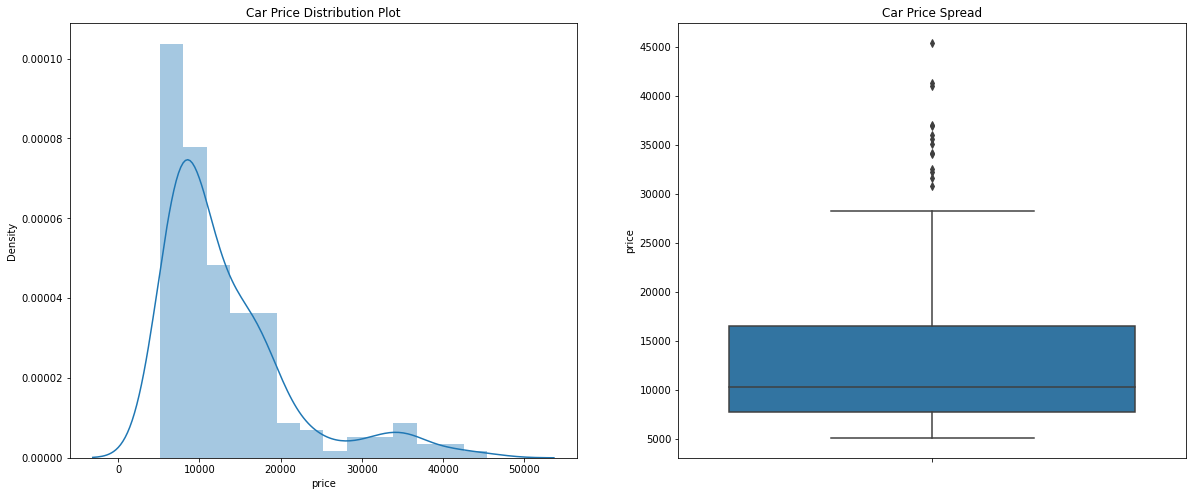

In [27]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(data_cars.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=data_cars.price)

plt.show()

In [28]:
print(data_cars.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
85%      18420.000000
90%      22470.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


- Có một sự khác biệt đáng kể giữa giá trị trung bình và trung bình của phân phối giá. 
- Các điểm dữ liệu được trải rộng từ giá trị trung bình, cho thấy sự thay đổi cao trong giá xe. (85% giá dưới 18.500, trong khi 15% còn lại nằm trong khoảng từ 18.500 đến 45.400.)
- Giá của xe có rất nhiều ngoại lệ (outliers) tuy nhiên việc này có thể đến từ các loại xe cao cấp hơn với các thông số tốt hơn các loại xe còn lại.

Chọn ra những biến dự đoán.
Đối với các biến liên tục sử dụng Pearson Correlation Coefficient và P-value để tìm các biến quan trọng trong việc dự đoán

In [29]:

def per_check_values(name):
    pearson_coef, p_value = stats.pearsonr(data_cars[name], data_cars['price'])
    print("Hệ số tương quan Pearsons của ",x," với price là: ", pearson_coef, " và giá trị P-value của P =", p_value )
    return();
for x in data_cars.columns.values.tolist():
    if type(data_cars.iloc[0][x]) == np.int32 or type(data_cars.iloc[0][x]) == np.float64 or type(data_cars.iloc[0][x]) == np.int64:
        per_check_values(x)

Hệ số tương quan Pearsons của  symboling  với price là:  -0.08239118716962358  và giá trị P-value của P = 0.2449148765716521
Hệ số tương quan Pearsons của  normalized-losses  với price là:  0.13399873429274334  và giá trị P-value của P = 0.05789749352703121
Hệ số tương quan Pearsons của  wheel-base  với price là:  0.5846418222655081  và giá trị P-value của P = 8.076488270732989e-20
Hệ số tương quan Pearsons của  length  với price là:  0.6906283804483642  và giá trị P-value của P = 8.016477466158759e-30
Hệ số tương quan Pearsons của  width  với price là:  0.7512653440522673  và giá trị P-value của P = 9.200335510481646e-38
Hệ số tương quan Pearsons của  height  với price là:  0.13548630756805974  và giá trị P-value của P = 0.055146273251013435
Hệ số tương quan Pearsons của  curb-weight  với price là:  0.8344145257702846  và giá trị P-value của P = 2.1895772388936914e-53
Hệ số tương quan Pearsons của  engine-size  với price là:  0.8723351674455185  và giá trị P-value của P = 9.2654916221

Ta sẽ chọn các biến không dựa theo quan hệ tuyến tính đến từ hệ số tương quan mà sẽ chọn tất cả các biến có P-value <0,001 thể hiện 2 biến này có ý nghĩa, giá trị thống kê.
Bao gồm các biến sau:
- Length
- Width
- Curb-weight
- Engine-size
- Horsepower
- City-mpg
- Highway-mpg
- Wheel-base
- Bore

Đối với biến không liên tục ta chọn biến 'drive-wheels' ta kiểm tra mối tương quan giữa drive-wheels và giá thông qua Analysis of Variance (ANOVA)

In [30]:
grouped_test2=data_cars[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)
grouped_test2.get_group('4wd')['price']
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


Ta thấy F-test Score thể hiện mối tương quan mạnh đồng cùng P- Value gần 0 thể hiện 2 biến này có ý nghĩa thống kê ta có thể dùng trong bài phân tích dự đoán.

# <span style="color:blue">Phát triển và đánh giá mô hình
</span><a id="2"></a>

### <span style="color:blue">Mô hình MLR</span><a id="21"></a>

In [31]:
lm = LinearRegression()

z=data_cars[['length','width','curb-weight','engine-size','horsepower','city-mpg','highway-mpg','wheel-base','bore']]
x_train, x_test, y_train, y_test = train_test_split(z, data_cars['price'], test_size = 0.2, random_state = 0)
lm.fit(x_train,y_train)
yhat=lm.predict(x_test)

### <span style="color:blue">Đánh giá mô hình bằng trực quan hóa dữ liệu</span><a id="22"></a>

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


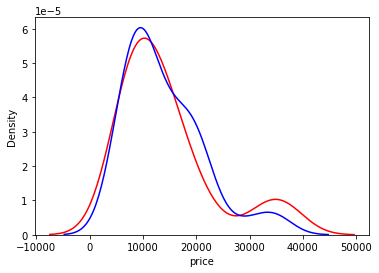

In [32]:
ax1= sns.distplot(y_test,hist=False,color='r',label="Gia tri thuc")
sns.distplot(yhat,hist=False,color='b',label="Gia tri du doan",ax=ax1)
plt.title ='Tuong quan giưa gia thuc va gia du doan'

Từ mô hình trên ta có thể thấy:
- Giá trị từ 43000 trở lên dự đoán sẽ không chính xác.
- Giá trị dự đoán từ 15000 đến 30000 cao hơn giá trị thực 1 khoảng tương đối.

### <span style="color:blue">Đánh giá mô hình bằng MSR và R2 </span><a id="23"></a>

In [33]:
score=r2_score(y_test,yhat)
print('r2 score',score)
print('mean_sqrd_error =',mean_squared_error(y_test,yhat))
print('root mean squared error =',np.sqrt(mean_squared_error(y_test,yhat)))

r2 score 0.7526778904552976
mean_sqrd_error = 18739668.42324163
root mean squared error = 4328.933866813124


Như vậy r2 score ở mức 75% tức mô hình MLR sẽ phù hợp với dữ liệu ở mức 75%.

##  Cảm ơn bạn vì đã giành thời gian đọc đến đây. Chúc bạn một ngày tốt lành